In [1]:
%matplotlib inline

# Basic Registration

As its name suggests, **ndreg**, is NeuroData's image REGistration python module.  Most ndreg functions are convinence wrappers around the SimpleITK registration framework.  Functions provided by ndreg should work reasonably well with *most* types of images.  More complicated problems should probably be handled by writing your own SimpleITK functions.  For a detailed handling of registration within SimpleITK see its [official notebooks](http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/).

The basic idea behind image registration is that given an input and reference images *I* and *J* with domain *X*, we seek a set parameters *p* of given coordinate transfom *T<sub>p</sub>* such that a *matching function* (or *metric* as ITK calls it) *M(I(T<sub>p</sub>(X)),J(X))* is minimized.  A good example of *M* is the Mean Square Error.  Mathematically it is the L<sub>2</sub> norm of the difference between the input and reference image *||I(T<sub>p</sub>(X)) - J(X)||*.

## Linear Registration
Linear Registration includes all registration algorithms in which T<sub>p</sub> is spatialy invariant.  This means that T<sub>p</sub> applies the same function to all voxels in the domain.  In ndreg linear registration is handled by the *imgAffine*.  Lets begin with a simple "Hello World" registration.  First we'll download two images from ndstore

In [2]:
import matplotlib.pyplot as plt
from ndreg import *
inImg = imgDownload("checkerBig")
refImg = imgDownload("checkerSmall")

Lets's display the input image

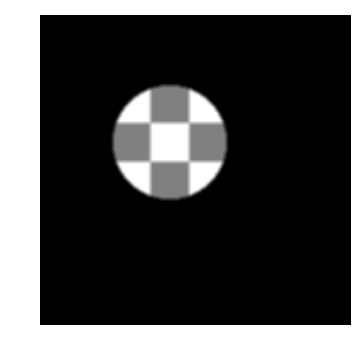

In [3]:
imgShow(inImg)

We want to align reference image to the input image.  The reference image is a scaled and translated version of the input image.

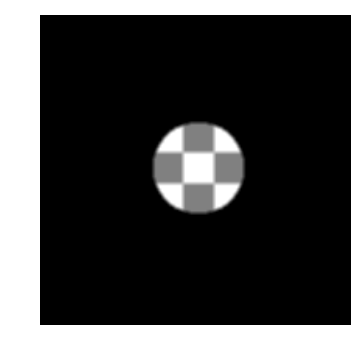

In [4]:
imgShow(refImg)

Obviously these images don't overlap.

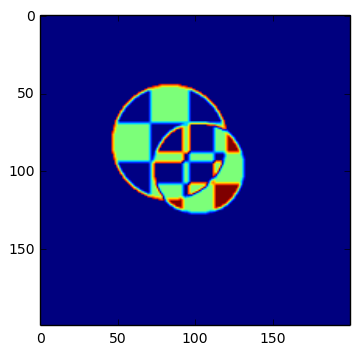

In [5]:
plt.imshow(sitk.GetArrayFromImage(refImg - inImg))

OK now lets register these images.  When no optional parameters are specified *imgAffine* compute affine parameters which can be used to transform the input image into the reference image under MSE matching.

In [6]:
affine = imgAffine(inImg, refImg)
print(affine)

[1.3698699181747709, -0.014549862591642653, -0.011269732049306235, 1.3716329256774848, -0.28444003942134205, -0.27209562767565465]


We can now apply these parameters to the input image using *imgApplyAffine*.

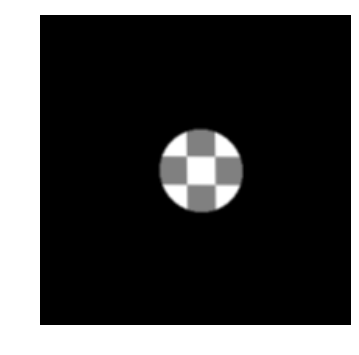

In [7]:
defInImg = imgApplyAffine(inImg, affine, size=refImg.GetSize())
imgShow(defInImg)

Clearly deformed input image *defInImg* overlaps the reference image *refImg*

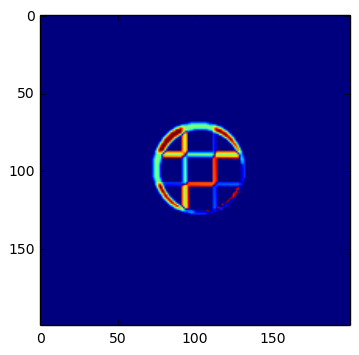

In [8]:
plt.imshow(sitk.GetArrayFromImage(refImg - defInImg))

## Nonlinear registation

In nonlinear registration algorithms transform T<sub>p</sub> is not spatially invariant.  A well known non-linear registation method is the Large Deformation Diffeomorphic Metric Mapping (LDDMM) algorithm.  LDDMM computes a smooth invertable mapping between the input (template) and reference (target) images.  In *ndreg*, it is implemented in the *imgMetamorphosis* function which returns both the transform parameters as a vector *field* and inverse parameters as *invField*.  We run the registation using the default parameters but limit it to 100 iterations

In [9]:
(field, invField) = imgMetamorphosis(inImg, refImg, iterations=100)

Like in the affine example we apply the transform to the image.

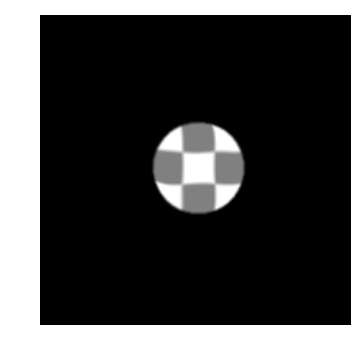

In [10]:
defInImg = imgApplyField(inImg, field, size=refImg.GetSize())
imgShow(defInImg)

We then show that the deformed input image overlaps with the reference image

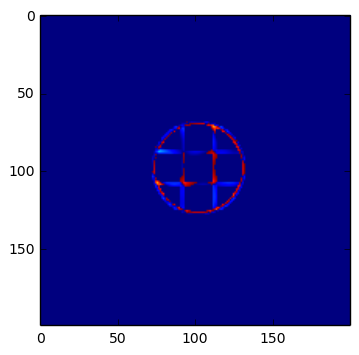

In [11]:
plt.imshow(sitk.GetArrayFromImage(refImg - defInImg))